#### K-means for example data

In [1]:
from sklearn import cluster
import numpy as np

<br>
<br>

#### 1. 데이터 준비

In [2]:
X = np.array([[2, 4], [2, 8], [2, 0],
              [8, 9], [4, 0], [0, 4]])
X

array([[2, 4],
       [2, 8],
       [2, 0],
       [8, 9],
       [4, 0],
       [0, 4]])

<br>
<br>

#### 2. 비어있는 모델 객체 만들기 + 3. 모델 학습시키기

In [10]:
kmeans = cluster.KMeans(n_clusters=2, random_state=0).fit(X) 
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [11]:
print("Clusters : ", kmeans.labels_)

Clusters :  [0 1 0 1 0 0]


In [12]:
print("Cluster centroids: ", kmeans.cluster_centers_) # 학습이 끝난 중심값을 확인하려면?

Cluster centroids:  [[2.  2. ]
 [5.  8.5]]


<br>
<br>

#### 4. 학습이 끝난 모델 테스트하기 (on test data)

In [13]:
print("Prediction cluster of [0, 0], [8, 4]: ", (kmeans.predict([[0, 0], [8, 4]]))) 

Prediction cluster of [0, 0], [8, 4]:  [0 1]


<br>
<br>

#### K-means for Iris data

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster
from sklearn import datasets
from sklearn import metrics

<br>
<br>

#### 1. (붓꽃 데이터) 데이터 읽어들이기 

In [15]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
print(X)
print()
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

<br>
<br>

#### 2. 비어있는 모델 객체 만들기 + 3. 모델 학습시키기

In [16]:
estimators = [('k=8', cluster.KMeans(n_clusters=8)),
              ('k=3', cluster.KMeans(n_clusters=3)),
              ('k=3(r)', cluster.KMeans(n_clusters=3, n_init=1, init='random'))] # random init

print(estimators[0]), print()
print(estimators[1]), print()
print(estimators[2])

# K-Means++ 알고리즘 : 최초의 중심값을 설정하기 위한 개선된 알고리즘
# 참고 : https://goo.gl/1ghahK & https://goo.gl/69zSB2

('k=8', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))

('k=3', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))

('k=3(r)', KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))


<br>
<br>

#### 4. 모델 시각화

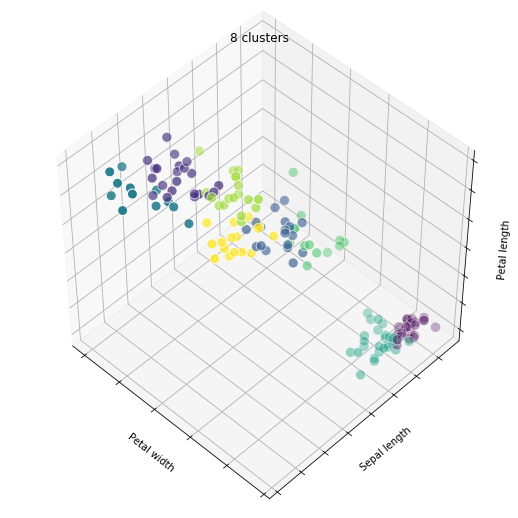

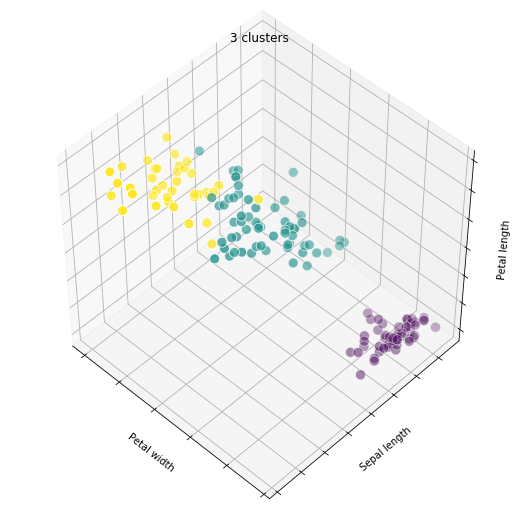

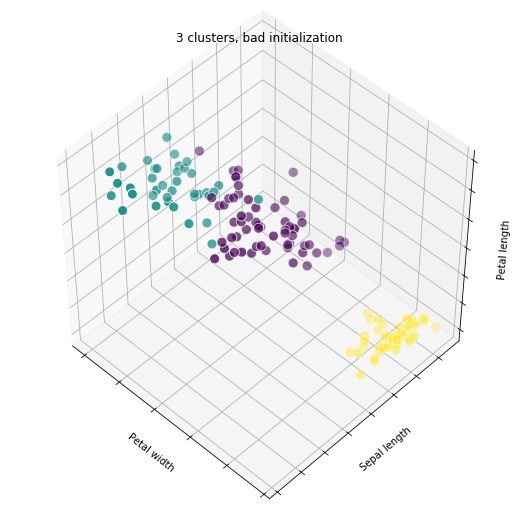

In [30]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

for name, est in estimators: # estimators : ('k=8', cluster.KMeans(n_clusters=8))
    fig = plt.figure(fignum, figsize=(7, 7))
    ax = Axes3D(fig, elev=48, azim=134) # Set the elevation and azimuth of the axes. (축의 고도와 방위각)
    
    est.fit(X)
    labels = est.labels_

    # X = iris.data
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), edgecolor='w', s=100)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 10 # 값이 커지면 전체 plot 이 작아짐
    fignum = fignum + 1

plt.show()

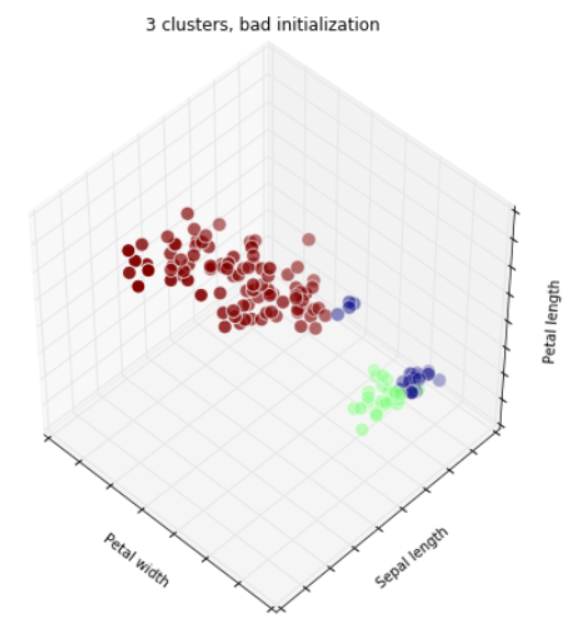

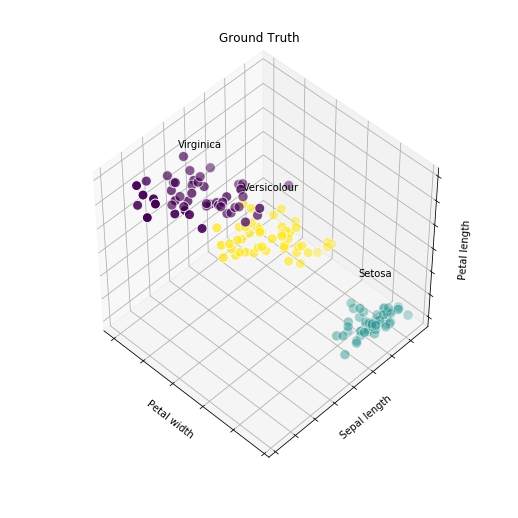

In [21]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(7, 7))
ax = Axes3D(fig,  elev=48, azim=134)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(), X[y == label, 0].mean(), X[y == label, 2].mean()+2, 
              name, horizontalalignment='center')

y = np.choose(y, [1, 2, 0]).astype(np.float) # Reorder the labels to have colors matching the cluster results
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='w', s=100)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

plt.show()

In [53]:
print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


<br>
<br>

### (extra) 최적 클러스터 개수 찾기
<br>

(1) **엘보우(elbow) 기법** :
- SSE(Sum of Squared Errors)의 값이 점점 줄어들다가 어느 순간 줄어드는 비율이 급격하게 작아지는 부분이 생기는데, 
- 결과물인 그래프 모양을 보면 팔꿈치에 해당하는 바로 그 부분이 최적의 클러스터 개수가 됨. 

In [ ]:
# def elbow(X):
#     total_distance = []
#     for i in range(1, 11):
#         model = cluster.KMeans(n_clusters=i, random_state=0)
#         model.fit(X)
        
#         # inertia : Sum of squared distances of samples to their closest cluster center.
#         total_distance.append(model.inertia_) 
        
#     plt.plot(range(1, 11), total_distance, marker='o')
#     plt.xlabel('# of clusters')
#     plt.ylabel('Total distance (SSE)')
#     plt.show()

# elbow(X) # Iris case : 2

(2) **실루엣(silhouette)** 기법 :
- 클러스터링의 품질을 정량적으로 계산해주는 방법 (K-means 뿐만 아니라 모든 클러스터링 기법에 적용 가능)
- i번째 데이터 x(i)에 대한 실루엣 계수(silhouette coefficient) s(i) 값은 아래의 식으로 정의
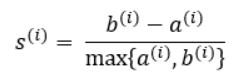
<br>
- a(i)는 **클러스터 내 데이터 응집도(cohesion)**를 나타내는 값 == 데이터 x(i)와 **동일한 클러스터 내의 나머지 데이터들과의 평균 거리**
- b(i)는 **클러스터 간 분리도(separation)**를 나타내는 값 == 데이터 x(i)와 **가장 가까운 클러스터 내의 모든 데이터들과의 평균 거리**
<br>
<br>
- 만약 클러스터 개수가 최적화 되어 있다면 b(i)의 값은 크고, a(i)의 값은 작아짐 -> s(i)의 값은 1에 가까운 숫자가 됨
- 반대로 클러스터내 데이터 응집도와 클러스터간 분리도의 값이 같으면 실루엣 계수 s(i)는 0 (데이터들을 클러스터로 분리하는 것이 무의미)
- 요약) **클러스터의 개수가 최적화되어 있으면 실루엣 계수의 값은 1에 가까운 값이 됨**

The average silhouette value is 0.68 (near 0.7 or 0.7+ : desirable)


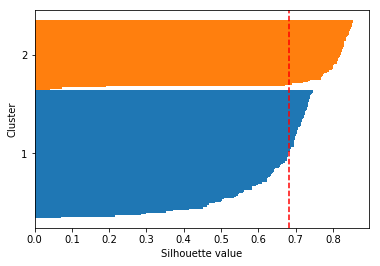

In [31]:
# import numpy as np
# from sklearn.metrics import silhouette_samples
# from matplotlib import cm

# def plotSilhouette(X, y_fitted):
#     cluster_labels = np.unique(y_fitted)
#     n_clusters = cluster_labels.shape[0] # ex) (3,) -> 3
#     silhouette_vals = silhouette_samples(X, y_fitted, metric='euclidean') # y_fitted 클러스터 라벨을 기준으로 한 X 데이터 각각이 가지는 실루엣 계수를 계산
#     y_ax_lower, y_ax_upper = 0, 0
#     yticks = []
    
#     for index, label in enumerate(cluster_labels):
#         cluster_silhouette_vals = silhouette_vals[y_fitted == label] # 각 라벨(center=3이면 0,1,2)에 해당하는 예측 데이터들의 실루엣 계수
#         cluster_silhouette_vals.sort()
        
#         # 라벨 순서대로 클러스터로 할당된 데이터 수만큼 y_ax_upper 에 더하여 y축 방향으로 쌓음
#         y_ax_upper += len(cluster_silhouette_vals) 
        
#         plt.barh(range(y_ax_lower, y_ax_upper), cluster_silhouette_vals, height=1.0) # barh(y, data), edge_color=None
#         yticks.append((y_ax_lower + y_ax_upper) / 2) # 그래프에서 y축 위에 클러스터 번호 라벨링 적용
        
#         # 라벨 순서대로 클러스터로 할당된 데이터 수만큼 y_ax_lower 에 더하여 y축 방향으로 쌓음
#         y_ax_lower += len(cluster_silhouette_vals) 
        
#     silhouette_avg = np.mean(silhouette_vals) # 전체 데이터에 대한 실루엣 계수의 평균
#     plt.axvline(silhouette_avg, color='red', linestyle='--') # 전체 데이터에 대한 실루엣 계수의 평균을 수직선으로 표시
#     print('The average silhouette value is', round(silhouette_avg, 2), '(near 0.7 or 0.7+ : desirable)')
    
#     plt.yticks(yticks, cluster_labels+1)
#     plt.ylabel('Cluster')
#     plt.xlabel('Silhouette value')
#     plt.show()

# model = cluster.KMeans(n_clusters=2) # Change the number of clusters
# y_fitted = model.fit_predict(X)
# plotSilhouette(X, y_fitted)

In [ ]:
# 간단하게 실루엣 계수의 평균만을 바로 구해 확인해 볼 수 있습니다 (for 문을 활용하여 여러 cluster 수를 기준으로 한 모델을 동시 비교 가능)

# from sklearn.metrics import silhouette_score
# silhouette_avg = silhouette_score(X, y_fitted)
# print("The average of silhouette coefficients is :", silhouette_avg)